# <center><font color="black">https://bit.ly/wfh-2021-taudata</font></center>
    
<img alt="" src="images/IDBigData/Cover_idBigData-2021.jpg" /> 
    
## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# <center><font color="blue">Tak Kenal, Maka Tak Sayang</font></center>

<center><img src="images/bio-about/bio_TS.png" /></center>

<font color="green">“*I am not what you see. I am what time and effort and interaction slowly unveil*.” ― Richelle E. Goodrich</font>

# <center><font color="blue">WFH 2021: Pengenalan Natural Language Processing (NLP) ~ Sentiment Analysis</font></center>

* Pendahuluan NLP & Textmining
* **Basic Document Representation**
 - Vector Space Model: tf-idf ~ BM25
 - normalization, Stopwords, & n-gram
 - *Discussion*: on Strength & weakness of VSM and-or tf-idf
* **Simple Text Preprocessing**
 - lemma, Slang & Abbreviation
* **Unsupervised Sentiment Analysis: Lexicon Based**
 - *Discussion*: Strength & weakness, Error & Model Analysis + Interpretation
* **Supervised Approach VSM + SVM**
 - *Discussion*: Strength & weakness, Error & Model Analysis + Interpretation
* **Sentimen Analysis via Deep Learning**
 - Word Embedding: Word2Vec & FastText
 - LSTM for Sentiment Analysis
 - *Discussion*: Strength & weakness, Error & Model Analysis + Interpretation
* **Penutup**
 - Further works, Recent approaches & problems in Sentiment Analysis

<font color="green">"*I always have a basic plot outline, but I like to leave some things to be decided while I write*." ~ J. K. Rowling</font>

# <center><font color="blue">Asumsi Workshop WFH 2021 - IDBigData</font></center>

* <font color="green">**Tantangan**</font>: 
 - Peserta dari berbagai latar belakang keilmuan dan tingkat kemampuan.
 - Hanya 3 jam (termasuk diskusi & rehat)
 - Daring (online)
* <font color="green">**Asumsi & Strategi**</font>:
 - Peserta diasumsikan mengenal sedikit tentang Python.
 - Hanya menggunakan kasus teks bahasa Indonesia
 - Fokus ke **Aplikasi Dasar** NLP/Textmining Sentimen Analisis.
 - **Code** diberikan/tunjukkan hanya sebagai demonstrasi (bukan kompetensi utama yang didapatkan dari kegiatan ini).

<center><img src="images/vector-icon/quiz-requirement.jpeg" width="399" height="249" /></center>

><font color="green">"*Minimum requirements & Maximum adjustments are two steps for Happy & Successful Life*" ~ Maulik Jadav</font>

image source: https://medium.com/@nipunithisarangi/level-up-your-requirement-gathering-game-cb1c42e9ffbd

# <center><font color="blue">Referensi & Resources:</font></center>

### <font color="green">Python:</font>
* Pengenalan Python: https://tau-data.id/adsp/ & https://tau-data.id/hpds/
* Python basic: https://www.python-course.eu/python3_history_and_philosophy.php 
* Data Science Basic: https://tau-data.id/dsbd/ & https://scikit-learn.org/stable/tutorial/index.html
* Advanced Python: http://andy.terrel.us/blog/2012/09/27/starting-with-python/
* Visualisasi di Python: https://matplotlib.org/gallery.html

<img alt="" src="images/tau-data_banner_large.jpg" style="width: 600px;" />

### <font color="green">NLP~Text Mining:</font>
* https://tau-data.id/nlptm/ , https://tau-data.id/sma/ https://tau-data.id/sna/
* https://github.com/ailabtelkom/id-NLP-resources
* https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia
* https://github.com/fajri91/InSet
* https://id.wiktionary.org/wiki/Wiktionary:ProyekWiki_bahasa_Indonesia/Daftar_kata

# <center><font color="blue">Instruksi Workshop:</font></center>

* **Side-by-side**: Atur jendela antar muka layar berdampingan.
* **Expand Sections**: Di Google Colab, klik "View", lalu pilih "Expand Sections"
* **Shortcuts**: Selama Workshop berlangsung, tekan tombol "ctrl+Enter" untuk menjalankan cell.
* **Run Anyway**: Saat pertama kali menjalankan cell akan ada warning box pop-up, silahkan pilih "Run Anyway"
* **Left Panel**: Disebelah kiri Google Colab, silahkan tekan "icon directory", di panel ini kita dapat unduh atau unggah file/folder.
* **Terurut (Sequential)**: Semua cell harus dijalankan terurut dari atas ke bawah, tanpa ada cell yang terlewati.

<center><img src="images/side-by-side.jpg" /></center>

In [1]:
import nltk, warnings; warnings.simplefilter('ignore')
import logging; logging.captureWarnings(True)
# Pilih "Run Anyway" di Pop-Up dialog yang muncul jika cell ini dijalankan di Google Colab

try:
    import google.colab
    IN_COLAB = True
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/s-pos.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/s-neg.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/s-negasi.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !pip install python-crfsuite unidecode textblob sklearn-pycrfsuite sastrawi gensim
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


In [2]:
# Importing Modules untuk Notebook ini
import re, matplotlib.pyplot as plt, pandas as pd, seaborn as sns, json
from textblob import TextBlob
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText

sns.set(style="ticks", color_codes=True)
random_state = 99
'Done'

'Done'

# <center><font color="blue">Apakah Perbedaan antara NLP dan Text Mining (TM)?</font></center>

<p><img alt="" src="images/1_jarvis.jpg" style="height: 450px; width: 600px;" /></p>

<p><a href="https://www.turn-on.de/lifestyle/topliste/zehn-film-gadgets-die-wir-uns-im-wahren-leben-wuenschen-4413" target="_blank"><strong>[Image Source]: https://www.turn-on.de/primetime/topliste/zehn-film-gadgets-die-wir-uns-im-wahren-leben-wuenschen-4413</strong></a></p>

# <center><font color="blue">NLP dan Text Mining</font></center>

<p><img alt="" src="images/1_Text_Analytics.jpg" style="height: 451px; width: 600px;" /></p>

<p>[Image Source: <a href="http://www.pearson.com.au/products/S-Z-Turban-Sharda/Business-Intelligence-and-Analytics-Systems-for-Decision-Support-Global-Edition/9781292009209?R=9781292009209" target="_blank">Efraim T. &quot;Business Intelligence and Analytics: Systems for Decision Support, Global Edition (10e)</a>&quot;]</p>


# <center><font color="blue">Aplikasi NLP dan Text Mining</font></center>

* Sentiment Analysis
* Speech Recognition dan Classification
* Machine Translation (Misal&nbsp;https://translate.google.com/ )
* Information Retrieval (IR)&nbsp;(misal www.google.com, bing, elasticsearch, etc.)
* Man-Machine Interface (misal Chatbot, Siri, cortana, atau Alexa)
* Named Entity Recognition (NER)
* Word Sense Disambiguation
* Topic Modelling, dsb

<p><img alt="" src="images/nlp-textmining-applications.jpg" /></p>

# <center><font color="blue">Sentimen Analysis</font></center>

<p><strong>Apakah sentiment analysis?</strong></p>

* Sentiment analysis, also called opinion mining, is the field of study that analyzes people’s opinions, sentiments, appraisals, attitudes, and emotions toward entities and their attributes expressed in written text [Bing Liu 2014].

<p>Terkadang disebut juga sebagai&nbsp;<strong>opinion mining.</strong> (walau technically sebenarnya berbeda)</p>

For proper definition see:
* Liu, B., 2015. Sentiment analysis: Mining opinions, sentiments, and emotions. Cambridge University Press.

<p><img style="undefined: undefined;" src="images/sentiment-analysis.jpg" width="589" height="231" /></p>

# <center><font color="blue">Aplikasi Sentiment analysis</font></center>

<img alt="" src="images/sentimen_analysis_interface.png" />

<p><img alt="" src="images/9_SA_techniques.jpg" style="height:300px; width:536px" /></p>

# <center><font color="blue">Preprocessing</font></center>

* Data Media Sosial sangat "noisy".
* Sama seperti data terstruktur: **Garbage-in~Garbage-out**
* Sebagian besar waktu akan habis untuk preprocessing.
* Di workshop ini hanya disinggung sekilas sebagian proses preprocessing data teks. Silahkan akses resources di cell sebelum ini untuk detail lebih jauh.

<img alt="" src="images/Data-preprocessing-steps-for-extractive-text-summarization.png" style="height:400px; width:487px" />

[<a href="https://www.researchgate.net/publication/317610956_Evaluation_of_Unsupervised_Learning_based_Extractive_Text_Summarization_Technique_for_Large_Scale_Review_and_Feedback_Data/figures?lo=1&utm_source=google&utm_medium=organic" target="_blank"><strong>Image Source</strong></a>]

# <center><font color="blue">Text Case Normalization (Huruf BESAR/kecil)</font></center>

<ul>
	<li>Untuk menganalisa makna (<em>semantic</em>) dari suatu (frase) kata dan mencari informasi dalam proses textmining, seringnya (*) kita tidak membutuhkan informasi huruf besar/kecil dari kata&nbsp;tersebut.</li>
	<li><em>Text case normalization</em> dapat dilakukan pada string secara efisien.</li>
	<li>Namun, bergantung pada analisa teks yang akan digunakan pengguna harus berhati-hati dengan urutan proses (pipelining) dalam preprocessing. Mengapa dan apa contohnya?</li>
</ul>

<p>(*) Coba temukan minimal 2 pengecualian dimana&nbsp; huruf kapital/kecil (case) mempengaruhi makna/pemrosesan teks.</p>

In [3]:
# Ignore case (huruf besar/kecil)
T = "Permisi Mas, kalau mau ikut workshop WFH-2021 daftarnya kemana ya? ...@@... "
print(T.lower())
print(T.upper())
# Perintah ini sangat efisien karena hanya merubah satu bit di setiap (awal) bytes dari setiap karakter
# Sehingga tetap efisien jika ingin dilakukan sebelum tokenisasi dan-atau pada data yang besar sekalipun.

permisi mas, kalau mau ikut workshop wfh-2021 daftarnya kemana ya? ...@@... 
PERMISI MAS, KALAU MAU IKUT WORKSHOP WFH-2021 DAFTARNYA KEMANA YA? ...@@... 


# <center><font color="blue">Tokenisasi</font></center>

<p>Tokenisasi adalah pemisahan kata, simbol, frase, dan entitas penting lainnya (yang disebut sebagai token) dari sebuah teks untuk kemudian di analisa lebih lanjut. Token dalam NLP sering dimaknai dengan &quot;sebuah kata&quot;, walau tokenisasi juga bisa dilakukan ke kalimat, paragraf, atau entitas penting lainnya (misal suatu pola string DNA di Bioinformatika).</p>

<p><strong>Mengapa perlu tokenisasi?</strong></p>

<ul>
	<li>Langkah penting dalam preprocessing, menghindari kompleksitas mengolah langsung pada string asal.</li>
	<li>Menghindari masalah (semantic) saat pemrosesan model-model natural language.</li>
	<li>Suatu tahapan sistematis dalam merubah unstructured (text) data ke bentuk terstruktur yang lebih mudah di olah.</li>
</ul>

<p><img alt="" src="images\2_Pipeline_Tokenization.png" style="height:300px; width:768px" /><br />
[<a href="https://www.softwareadvice.com/resources/what-is-text-analytics/" target="_blank"><strong>Image Source</strong></a>]: https://www.softwareadvice.com/resources/what-is-text-analytics/</p>


# <center><font color="blue">Tokenisasi Berbagai Bahasa</font></center>

<p><img alt="" src="images/2_Tokenization_Complexity.jpg" style="height:500px; width:686px" /><br />
[<a href="http://aclweb.org/anthology/Y/Y11/Y11-1038.pdf" target="_blank"><strong>Image Source</strong></a>]</p>


## Contoh Tokenisasi dengan Module <font color="blue"> TextBlob</font>

<p>*Blob : Binary large Object</p>

In [4]:
# Tokenizing di TextBlob
T = "Permisi Mas, kalau mau ikut workshop WFH-2021 daftarnya kemana ya? ...@@... "
print(TextBlob(T).words)

['Permisi', 'Mas', 'kalau', 'mau', 'ikut', 'workshop', 'WFH-2021', 'daftarnya', 'kemana', 'ya']


# <center><font color="blue">NLP Bahasa Indonesia</font></center>

<p>NLTK belum support Bahasa Indonesia, bahkan module NLP Python yang support bahasa Indonesia secara umum masih sangat langka. Beberapa <u><strong>resources </strong></u>yang dapat digunakan:</p>

<ol>
	<li><strong><a href="https://github.com/kirralabs/indonesian-NLP-resources" target="_blank">KirraLabs</a></strong>: Mix of NLP-TextMining resources</li>
	<li><strong><a href="https://pypi.python.org/pypi/Sastrawi/1.0.1" target="_blank">Sastrawi 1.0.1</a>:</strong>&nbsp;untuk &quot;stemming&quot; &amp;&nbsp;<strong><a href="https://devtrik.com/python/stopword-removal-bahasa-indonesia-python-sastrawi/" target="_blank">stopwords&nbsp;</a></strong>bahasa Indonesia.</li>
	<li><strong><a href="http://stop-words-list-bahasa-indonesia.blogspot.co.id/2012/09/daftar-kata-dasar-bahasa-indonesia.html" target="_blank">Daftar Kata Dasar Indonesia</a></strong>:&nbsp;Bisa di load sebagai dictionary di Python</li>
	<li><strong><a href="https://id.wiktionary.org/wiki/Wiktionary:ProyekWiki_bahasa_Indonesia/Daftar_kata" target="_blank">Wiktionary</a></strong>: ProyekWiki bahasa Indonesia [termasuk Lexicon]</li>
	<li><a href="http://wn-msa.sourceforge.net/" target="_blank"><strong>WordNet Bahasa Indonesia</strong></a>: Bisa di load&nbsp;sebagai dictionary (atau NLTK<em>*</em>) di Python.</li>
	<li><strong><a href="http://kakakpintar.com/daftar-kata-baku-dan-tidak-baku-a-z-dalam-bahasa-indonesia/" target="_blank">Daftar Kata Baku-Tidak Baku</a></strong>: Bisa di load sebagai dictionary di Python.</li>
	<li><strong><a href="https://spacy.io/" target="_blank">Spacy</a></strong>: Cepat/efisien, MIT License, tapi language model Indonesia masih terbatas.</li>
	<li><a href="http://ufal.mff.cuni.cz/udpipe" target="_blank"><strong>UdPipe</strong></a>: Online request &amp; restricted license (support berbagai bahasa -&nbsp;pemrograman).</li>
</ol>

# <center><font color="blue">Morphological-Linguistic Normalization: Stemming & Lemmatization</font></center>

### (Canonical Representation)
<img alt="" src="images/meme-cartoon/2_yoda.jpg" style="height:400px; width:400px" />

## <font color="blue">Stemming dan Lemma</font>

<ol>
	<li>
	<p><strong>Stemmer</strong>&nbsp;akan menghasilkan sebuah bentuk kata yang disepakati oleh suatu sistem tanpa mengindahkan konteks kalimat. Syaratnya beberapa kata dengan makna serupa hanya perlu dipetakan secara konsisten ke sebuah kata baku.&nbsp;Banyak digunakan di IR &amp;&nbsp;komputasinya relatif sedikit. Biasanya dilakukan dengan menghilangkan imbuhan (suffix/prefix).</p>
	</li>
	<li>
	<p><strong>lemmatisation</strong> akan menghasilkan kata baku (dictionary word) dan bergantung konteks.</p>
	</li>
	<li>
	<p>Lemma &amp; stemming bisa jadi sama-sama menghasilkan suatu akar kata (root word). Misal : <em>Melompat </em>==&gt; <em>lompat</em></p>
	</li>
</ol>

<p><strong>Mengapa melakukan Stemming &amp; Lemmatisasi</strong>?</p>

<ol>
	<li>Sering digunakan di IR (Information Retrieval) agar ketika seseorang mencari kata tertentu, maka seluruh kata yang terkait juga diikutsertakan.<br />
	Misal:&nbsp;<em>organize</em>,&nbsp;<em>organizes</em>, and&nbsp;<em>organizing&nbsp;</em>&nbsp;dan&nbsp;<em>democracy</em>,&nbsp;<em>democratic</em>, and&nbsp;<em>democratization</em>.</li>
	<li>Di Text Mining Stemming dan Lemmatisasi akan mengurangi dimensi (mengurangi variasi morphologi), yang terkadang akan meningkatkan akurasi.</li>
	<li>Tapi di IR efeknya malah berkebalikan: <strong><font color="blue">meningkatkan recall, tapi menurunkan akurasi&nbsp;</font></strong>[<a href="https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html" target="_blank"><strong>Link</strong></a>]. Contoh: kata&nbsp;<em>operate, operating, operates, operation, operative, operatives, dan operational</em>&nbsp;jika di stem menjadi <em>operate</em>, maka ketika seseorang mencari &quot;<em>operating system</em>&quot;, maka entry seperti&nbsp;<em>operational and research</em> dan&nbsp;<em>operative and dentistry</em>&nbsp;akan muncul sebagai entry dengan relevansi yang cukup tinggi.</li>
</ol>

In [5]:
# Lemmatizer dengan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

print(stemmer.stem("Test1: perayaan itu Berbarengan dengan saat kita bepergian ke Depok"))
print(stemmer.stem("Test2: Perayaan, Bepergian, Menyuarakan"))
# Amati dan analisa hasilnya dengan seksama.

test1 raya itu bareng dengan saat kita pergi ke depok
test2 raya pergi suara


# <center><font color="blue">Text Level Normalization: StopWords</font></center>

<p><u>Di Text Mining</u> kata-kata yang <strong>sering muncul </strong>(dan jarang sekali muncul) memiliki sedikit sekali informasi (signifikansi) terhadap model (machine learning) yang digunakan. Hal ini di karenakan kata-kata tersebut muncul di semua kategori (di permasalahan klasifikasi) atau di semua cluster (di permasalahan pengelompokan/clustering). Kata-kata yang sering muncul ini biasa disebut &quot;StopWords&quot;. Stopwords berbeda-beda bergantung dari Bahasa dan Environment (aplikasi)-nya.<br />
<strong>Contoh</strong>:<br />

<ul>
	<li>Stopwords bahasa Inggris: am, is, are, do, the, of, etc.</li>
	<li>Stopwords bahasa Indonesia: adalah, dengan, yang, di, ke, dsb</li>
	<li>Stopwords twitter: RT, ...<br />
	<img alt="" src="images/2_StopWords.png" style="height:250px; width:419px" /></li>
</ul>


In [6]:
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_en = stopwords.words('english')
stop_id = StopWordRemoverFactory().get_stop_words()

print(stop_en[:10]); print(stop_id[:10])
print(len(stop_id), len(stop_en))
stop_en = set(stop_en); stop_id = set(stop_id) # Tips: selalu rubah list stopwords ke bentuk set, karena di Python jauh lebih cepat untuk cek existence di set ketimbang list

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua']
126 179


In [7]:
'yang' in stop_id

True

In [8]:
# Contoh cara menggunakan stopwords
T = "untuk kamu yang disana, sudah makan belum?"
Tokens = TextBlob(T.lower()).words # Tokenisasi 
' '.join([t for t in Tokens if t not in stop_id])

'kamu disana makan'

# <center><font color="blue">Menangani Slang atau Singkatan di Data Teks</font></center> 

In [9]:
# Cara me-load daftar singkatan/slang
with open('data/slang.dic') as f:
    slang = json.load(f)

str(slang)[:51]

"{'1pun': 'satupun', '7an': 'tujuan', 'Dr.': 'doktor"

In [10]:
slang['7an']

'tujuan'

In [11]:
# Contoh Penggunaan
T = 'jangan ragu gan, langsung saja di order pajangan yg diatas. sesok sdh mehong!'
T = TextBlob(T).words

for i, t in enumerate(T):
    if t in slang.keys():
        T[i] = slang[t]
        
print(' '.join(T))

jangan ragu juragan langsung saja di order pajangan yang diatas besok sudah mahal


# <center><font color="blue">Encoding-Decoding</font></center> 

<ul>
	<li>Hal berikutnya yang perlu diperhatikan dalam memproses data teks adalah encoding-decoding.</li>
	<li>Contoh Encoding: ASCII, utf, latin, dsb.</li>
	<li>saya membahas lebih jauh tetang encoding disini:&nbsp;<br />
	<a href="https://tau-data.id/memahami-string-python/" target="_blank">https://tau-data.id/memahami-string-python/</a></li>
	<li>Berikut adalah sebuah contoh sederhana tantangan proses encoding-decoding ketika kita hendak memproses data yang berasal dari internet atau media sosial.</li>
</ul>


In [12]:
# kita bisa menggunakan modul unidecode untuk mendapatkan representasi ASCII terdekat
from unidecode import unidecode

T = "ḊḕḀṙ ₲ØĐ, p̾l̾e̾a̾s̾e ḧḕḶṖ ṁḕ"
print(unidecode(T).lower())

dear god, please help me


In [13]:
# Kita juga bisa membersihkan posting media sosial/website dengan entitas html menggunakan fungsi "unescape" di modul "html"
from html import unescape

print(unescape('Satu &lt; Tiga&nbsp;&amp; &#169; adalah simbol Copyright'))

Satu < Tiga & © adalah simbol Copyright


# <center><font color="blue">Loading Data</font></center>

* Menggunakan Data Sentimen Twitter dari: https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia
* Silahkan kunjungi tautan diatas untuk mengakses dataset sentimen lainnya.

In [14]:
data = pd.read_csv("data/ind_SA.csv")
print("Banyak tweet di data = {} tweet".format(data.shape[0]))
data.head(3)

Banyak tweet di data = 10806 tweet


,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...


In [15]:
# Di python index dimulai dari "0"
print('Tweet pertama = "{}"'.format(data.Tweet.loc[0]))
data = data.sample(3000) # Agar komputasi tidak terlalu lama, kita sample datanya.

Tweet pertama = "lagu bosan apa yang aku save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu"


# <center><font color="blue">Eksplorasi Data</font></center> 

* Preprocessing sederhana
* Memisahkan yang positif dan negatif
* Simpan dalam bentuk Teks
* Visualisasi & Eksplorasi

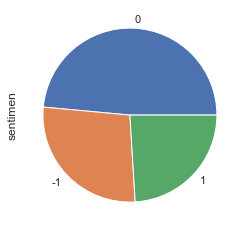

In [16]:
plot = data.sentimen.value_counts().plot(kind='pie')

In [17]:
def cleanTxt(t, lemma=True, stopword=True, slang_=True):
    T = unescape(unidecode(str(t).lower()))
    if lemma:
        T = stemmer.stem(t) # ingat struktur data sastrawi
    T = TextBlob(T).words # Tokenisasi 
    if stopword: #butuh "stop_id" sudah di load terlebih dahulu
        T = [t for t in T if t not in stop_id]
    if slang_: #butuh "slang" sudah di load terlebih dahulu
        for i, t in enumerate(T):
            if t in slang.keys():
                T[i] = slang[t]
    return ' '.join(T) # output string lagi

In [18]:
# Test Fungsi CleanText sederhana
t = "utk kamu yg disana, sdh makan belum?"
cleanTxt(t)
# Analisa hasilnya

'untuk kamu yang sana sudah makan'

In [19]:
# Preprocessing ke seluruh Tweet dan simpan dalam kolom yang baru
data['dataCleaned'] = [cleanTxt(d.Tweet) for i,d in tqdm(data.iterrows())]
data.head()

3000it [07:10,  6.97it/s]


,sentimen,Tweet,dataCleaned
5594,0,cara untuk hilangkan tekanan oleh ustazah nor ...,cara hilang tekan ustazah nor hafizah musa cub...
595,-1,koreaelatan jerman kudampingi kau dari nol sam...,koreaelatan jerman damping kamu nol mapan eh k...
8683,0,salah satu tujuan revolusi mental adalah membi...,salah satu tuju revolusi mental biasa diri unt...
4244,0,lf siang lemons aku baru bikin akun myday mutu...,lf siang lemons aku baru bikin akun myday mutu...
7348,0,tidaklah mungkin bagi matahari mendapatkan bul...,mungkin matahari bulan malam siang masing-masi...


In [20]:
pos = [d.dataCleaned for i,d in data.iterrows() if d.sentimen==1]
neg = [d.dataCleaned for i,d in data.iterrows() if d.sentimen==-1]
pos[:3]

['okaay nggapapaa aku minta doyoung ajaa terima kasih yaa',
 'enaknyaaaaaa huhu aku jakarta sih semalem nge email sesuai ajar kamu baru bertanya saja dibi',
 'tahu orang ajar bijaksana']

In [21]:
def simpan(Teks, namafile): #in Json Format
    with open(namafile, 'w') as f:
        for t in Teks:
            f.write(t+'\n')

In [22]:
simpan(pos, 'tweet-positif.txt')
simpan(neg, 'tweet-negatif.txt')
"Done"

'Done'

# <center><font color="blue">Text Analytics - Voyant Tools</font></center> 

### https://voyant-tools.org/

* WordCloud, Word Links, Word Tree

<img alt="" src="images/11_voyant.png" style="height:118px; width:426px" /> 

# <center><font color="blue">Unsupervised Sentiment Analysis</font></center> 

Algoritma:
1. Load Lexicon Positif dan Negatif
2. Hitung jumlah kata positif dan negatif di data



In [23]:
# Fungsi Load Lexicon
def loadLexicon(file):
    df=open(file,"r",encoding="utf-8", errors='replace')
    data=df.readlines();df.close()
    return [d.strip().lower() for d in data]

In [24]:
fpos, fneg, fnegasi = 'data/s-pos.txt', 'data/s-neg.txt', 'data/s-negasi.txt'
positif, negatif, negasi = loadLexicon(fpos), loadLexicon(fneg), loadLexicon(fnegasi)
print(positif[:10])
print(negatif[:10])
print(negasi[:10])

['a+', 'acungan jempol', 'adaptif', 'adil', 'afinitas', 'afirmasi', 'agilely', 'agung', 'ahli', 'ahlinya']
['abnormal', 'absurd', 'acak', 'acak-acakan', 'acuh', 'acuh tak acuh', 'adiktif', 'adil', 'agresi', 'agresif']
['belum', 'bukan', 'engga', 'enggak', 'ga', 'harusnya', 'nggak', 'tak', 'tidak']


In [25]:
def prediksiSentiment(kalimat, positif, negatif, negasi):
    # Naive Approach, nanti akan kita diskusikan bagaimana improvisasi fungsi sederhana ini
    posWords = []
    negWords = [w for w in negatif if w in kalimat]
    for w in positif:
        if w in kalimat:
            negated = False
            for n in negasi:
                if n+' '+w in kalimat:
                    negWords.append(n+' '+w)
                    negated = True
                    break
            if not negated:
                posWords.append(w)
    nPos, nNeg = len(posWords), len(negWords)
    if nPos>nNeg:
        return 1
    if nPos<nNeg:
        return -1
    else:
        return 0
"Done"

'Done'

In [26]:
# Test
T = "mie ayam ini enak"
prediksiSentiment(T, positif, negatif, negasi)

1

# <center><font color="blue">Discussion: Strength & weakness, Error & Model Analysis + Interpretation</font></center> 

1. Apa kelebihan dan kekurangannya?
2. Apa yang bisa dilakukan untuk mencoba memperbaikinya?
3. Interpretasi hasil Positif dan Negatifnya.
4. Mari analisa data-data yang salah diprediksi.

## <center><font color="blue">Metode unsupervised yang lain</font></center>

* Bing Liu’s, MPQA subjectivity, AFINN, SentiWordNet, VADER, dll
* Contoh penggunaan Vader & Afinn: https://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project03%20-%20Sentiment%20Analysis%20Unsupervised%20Lexical%20Models.ipynb

In [27]:
# Prediksi ke seluruh data
data['unsupervised'] = [prediksiSentiment(t.Tweet, positif, negatif, negasi) for i,t in tqdm(data.iterrows())]
data.head()

3000it [00:00, 3250.19it/s]


,sentimen,Tweet,dataCleaned,unsupervised
5594,0,cara untuk hilangkan tekanan oleh ustazah nor ...,cara hilang tekan ustazah nor hafizah musa cub...,-1
595,-1,koreaelatan jerman kudampingi kau dari nol sam...,koreaelatan jerman damping kamu nol mapan eh k...,0
8683,0,salah satu tujuan revolusi mental adalah membi...,salah satu tuju revolusi mental biasa diri unt...,-1
4244,0,lf siang lemons aku baru bikin akun myday mutu...,lf siang lemons aku baru bikin akun myday mutu...,0
7348,0,tidaklah mungkin bagi matahari mendapatkan bul...,mungkin matahari bulan malam siang masing-masi...,-1


In [28]:
from sklearn.metrics import classification_report

print(classification_report(data.sentimen, data.unsupervised))

              precision    recall  f1-score   support

          -1       0.41      0.53      0.46       823
           0       0.58      0.45      0.51      1456
           1       0.36      0.40      0.38       721

    accuracy                           0.46      3000
   macro avg       0.45      0.46      0.45      3000
weighted avg       0.48      0.46      0.46      3000



# <center><font color="red">Hasilnya jelek sekali, apakah pendekatan ini seburuk itu?</font></center> 

## Mari kita analisa lebih lanjut

In [29]:
betul = [d.Tweet for i,d in data.iterrows() if d.sentimen==d.unsupervised]
salah = [d.Tweet for i,d in data.iterrows() if d.sentimen!=d.unsupervised]
simpan(betul, 'unsupervised-betul.txt')
simpan(salah, 'unsupervised-salah.txt')
"Done" # Lanjut ke Voyant Tool

'Done'

# <center><font color="blue">Representasi Dokumen/Teks</font></center> 

<img alt="" src="images/3_Bentuk umum representasi dokumen.JPG" style="height: 294px ; width: 620px" />

# <center><font color="blue">tf-idf: Term Frequency - Inverse Document Frequency</font></center> 

<img alt="" src="images/toydata_vsm.png" />

* Menurut http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* default formula tf-idf yang digunakan sk-learn adalah:

* $tfidf = tf * log(\frac{N}{df+1})$ ==> linear_tf, Smooth IDF
* namun kita merubahnya menjadi:
* $tfidf = tf * log(\frac{N}{df})$ ==> linear_tf, Non Smooth IDF
* $tfidf = (1+log(tf)) * log(\frac{N}{df+1})$ ==> sublinear_tf, Smooth IDF
* $tfidf = (1+log(tf)) * log(\frac{N}{df})$ ==> sublinear_tf, Non Smooth IDF

<h2 id="Best-Match-Formula-:-BM25">Best-Match Formula : BM25</h2>

<p><img alt="" src="images/3_bm25_simple.png" style="height: 123px; width: 300px;" /></p>

<ol>
	<li>di IR nilai b dan k yang optimal adalah :&nbsp;<strong> <em>b</em> = 0.75&nbsp; dan k = [1.2 - 2.0]&nbsp; &nbsp;</strong><br />
	ref:&nbsp;<em>Christopher, D. M., Prabhakar, R., &amp; Hinrich, S. C. H. &Uuml;. T. Z. E. (2008). Introduction to information retrieval.&nbsp;An Introduction To Information Retrieval,&nbsp;151, 177.</em></li>
	<li>Tapi kalau untuk TextMining (clustering) nilai <strong>k optimal adalah 20, nilai b = sembarang (boleh = 0.75)</strong><br />
	ref:&nbsp;<em>Whissell, J. S., &amp; Clarke, C. L. (2011). Improving document clustering using Okapi BM25 feature weighting.&nbsp;Information retrieval,&nbsp;14(5), 466-487.</em></li>
	<li><strong>avgDL </strong>adalah rata-rata panjang dokumen di seluruh dataset dan <strong>DL </strong>adalah panjang dokumen D.<br />
	hati-hati, ini berbeda dengan &nbsp;tf-idf MySQL diatas.</li>
</ol>


In [30]:
# Menggunakan modul SciKit untuk merubah data tidak terstruktur ke VSM
# Scikit implementation http://scikit-learn.org/stable/modules/feature_extraction.html
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Parameter: lowercase=True, smooth_idf= True, sublinear_tf=True,  ngram_range=(1, 2), max_df=0.90, min_df=2

In [31]:
# Variasi pembentukan matriks VSM:
d1 = '@udin76, Minum kopi pagi-pagi sambil makan pisang goreng is the best'
d2 = 'Belajar NLP dan Text Mining ternyata seru banget sadiezz'
d3 =  'Sudah lumayan lama bingits tukang Bakso belum lewat'
d4 = 'Aduh ga banget makan Mie Ayam p4k4i kesyap, please deh'

D = [d1, d2, d3, d4]
# Jika kita menggunakan cara biasa: 
tfidf_vectorizer = TfidfVectorizer(lowercase=True)
vsm = tfidf_vectorizer.fit_transform(D)
print(tfidf_vectorizer.vocabulary_)

{'udin76': 35, 'minum': 21, 'kopi': 14, 'pagi': 24, 'sambil': 28, 'makan': 18, 'pisang': 25, 'goreng': 11, 'is': 12, 'the': 33, 'best': 6, 'belajar': 4, 'nlp': 22, 'dan': 8, 'text': 32, 'mining': 20, 'ternyata': 31, 'seru': 29, 'banget': 3, 'sadiezz': 27, 'sudah': 30, 'lumayan': 17, 'lama': 15, 'bingits': 7, 'tukang': 34, 'bakso': 2, 'belum': 5, 'lewat': 16, 'aduh': 0, 'ga': 10, 'mie': 19, 'ayam': 1, 'p4k4i': 23, 'kesyap': 13, 'please': 26, 'deh': 9}


In [32]:
# N-Grams VSM
# Bermanfaat untuk menangkap frase kata, misal: "ga banget", "pisang goreng", dsb
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vsm = tfidf_vectorizer.fit_transform(D)
print(tfidf_vectorizer.vocabulary_)

{'udin76': 69, 'minum': 41, 'kopi': 27, 'pagi': 47, 'sambil': 55, 'makan': 34, 'pisang': 50, 'goreng': 21, 'is': 23, 'the': 65, 'best': 13, 'udin76 minum': 70, 'minum kopi': 42, 'kopi pagi': 28, 'pagi pagi': 48, 'pagi sambil': 49, 'sambil makan': 56, 'makan pisang': 36, 'pisang goreng': 51, 'goreng is': 22, 'is the': 24, 'the best': 66, 'belajar': 9, 'nlp': 43, 'dan': 16, 'text': 63, 'mining': 39, 'ternyata': 61, 'seru': 57, 'banget': 6, 'sadiezz': 54, 'belajar nlp': 10, 'nlp dan': 44, 'dan text': 17, 'text mining': 64, 'mining ternyata': 40, 'ternyata seru': 62, 'seru banget': 58, 'banget sadiezz': 8, 'sudah': 59, 'lumayan': 32, 'lama': 29, 'bingits': 14, 'tukang': 67, 'bakso': 4, 'belum': 11, 'lewat': 31, 'sudah lumayan': 60, 'lumayan lama': 33, 'lama bingits': 30, 'bingits tukang': 15, 'tukang bakso': 68, 'bakso belum': 5, 'belum lewat': 12, 'aduh': 0, 'ga': 19, 'mie': 37, 'ayam': 2, 'p4k4i': 45, 'kesyap': 25, 'please': 52, 'deh': 18, 'aduh ga': 1, 'ga banget': 20, 'banget makan': 7

In [33]:
# Vocabulary based VSM
# Bermanfaat untuk menghasilkan hasil analisa yang "bersih"
# variasi 2
D = [d1,d2,d3,d4]
Vocab = {'seru banget':0, 'seru':1, 'the best':2, 'lama':3, 'text mining':4, 'nlp':5, 'ayam':6}
tfidf_vectorizer = TfidfVectorizer(vocabulary=Vocab)
vsm = tfidf_vectorizer.fit_transform(D)
print(vsm.toarray())
tfidf_vectorizer.vocabulary_

[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.70710678 0.         0.         0.         0.70710678
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]]


{'seru banget': 0,
 'seru': 1,
 'the best': 2,
 'lama': 3,
 'text mining': 4,
 'nlp': 5,
 'ayam': 6}

    
# <center><strong><font color="blue">Supervised Sentiment Analysis</font></strong></center>


In [34]:
# Bentuk VSM-nya
tfidf_vectorizer = TfidfVectorizer(lowercase=True,smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.95, min_df=2)

In [35]:
from sklearn.model_selection import train_test_split
seed = 99

x_train, x_test, y_train, y_test = train_test_split(data['dataCleaned'], data['sentimen'], test_size=0.2, random_state=seed)
x_train = tfidf_vectorizer.fit_transform(x_train) # "Fit_Transform"
x_test = tfidf_vectorizer.transform(x_test) # Perhatikan disini hanya "Transform"

print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

(2400, 4280) (600, 4280)


In [36]:
# SVM: http://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

dSVM = svm.SVC(kernel='linear', decision_function_shape='ovo') # oneversus one SVM
dSVM.fit(x_train, y_train)

y_SVM = dSVM.predict(x_test)
print(classification_report(y_test, y_SVM))

              precision    recall  f1-score   support

          -1       0.49      0.39      0.43       161
           0       0.63      0.80      0.71       310
           1       0.57      0.34      0.43       129

    accuracy                           0.59       600
   macro avg       0.56      0.51      0.52       600
weighted avg       0.58      0.59      0.57       600



## Hasilnya rendah? ... Hhmmmm ... Mari coba optimalkan model.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline 

x_train, x_test, y_train, y_test = train_test_split(data['dataCleaned'], data['sentimen'], test_size=0.2, random_state=seed)
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
pipeSVM = make_pipeline(TfidfVectorizer(), svm.SVC())
#print(sorted(pipeSVM.get_params().keys()))

paramsSVM = {}
paramsSVM['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsSVM['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsSVM['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsSVM['svc__C'] = [0.1, 10, 100] #sp.stats.uniform(scale=1)
paramsSVM['svc__gamma'] = [1.0, 0.1, 0.001]
paramsSVM['svc__kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

gridsvmCV = GridSearchCV(pipeSVM, paramsSVM, cv=5, scoring='accuracy', verbose=1, n_jobs=-3)
gridsvmCV.fit(x_train, y_train) # hati-hati disini x_train harus Text
print(gridsvmCV.best_score_)
print(gridsvmCV.best_params_)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


# Mungkin Modelnya yang tidak mampu mengklasifikasikan?

## Kita coba Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier()
NN.fit(x_train, y_train)
y_NN = NN.predict(x_test)

print(classification_report(y_test, y_NN))

# <center><font color="blue">Dengan cara yang sama seperti tadi, coba analisa data yang salah di prediksi</font></center> 

### Coba juga ke seluruh data dan variasi preprocessing

# <center><font color="blue">Di kesempatan lain kita bisa coba dengan model Deep Learning</font></center> 

<p><img alt="" src="images/5_DeepLearning.png" style="width: 690px ; height: 777px" /></p>

<p><big>Yang menjadi pembeda utama DL dengan ML adalah DL &quot;<em>Learning representations from data</em>&quot;. Misal Word Embedding (bandingkan dengan VSM di Machine Learning).<br />
Makna &quot;Deep&quot; di DL sendiri bermakna &quot;successive layers of representations&quot; biasa juga disebut sebagai&nbsp;<em>layered representations learning</em> atau <em>hierarchical representations learning</em>.</big></p>

# LSTM: Long Short Term memory

### https://tau-data.id/lstm/

# <center><font color="blue">Better Unsupervised Sentiment Analysis</font></center>

<p><img src="images/satriadata2021/unsupervised_sentimen_analysis.png" /></p>

* Feature Engineering, Lexicon Based, & Bayesian Model
* image source: 
 - http://pasaentuciudad.com.mx/sentiment-analysis%E2%80%8A-%E2%80%8Acomparing-3-common-approaches-naive-bayes-lstm-and-vader/
 - https://www.emerald.com/insight/content/doi/10.1016/j.aci.2019.11.003/full/html

# <center><font color="blue">Improvement Implementasi di Industri</font></center>

* **Hierarchical Classification**: Aspect-Based Sentiment Analysis
* **Hybrid Model**: Sentimen Analysis ==> Topic Modelling

<p><img src="images/Aspect-based-sentiment.png" alt="" width="399" height="187" /></p>

<h2 id="Supplementary">Supplementary</h2>

<p>* Negasi suatu kata bukan berarti memiliki sentimen kebalikannya. Misal &quot;jelek&quot; dan &quot;tidak jelek&quot; (terrible vs not terrible).</p>

<p><img alt="" src="images/negation_sentiments.png" /></p>

<p>[*]. Zhu, X., Guo, H., Mohammad, S., &amp; Kiritchenko, S. (2014). An empirical study on the effect of negation words on sentiment. In&nbsp;<i>Proceedings of the 52nd Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers)</i>&nbsp;(Vol. 1, pp. 304-313).</p>


* Makna positive/negative atau pro/kontra subjective (bias) terhadap user.
* StopWords removal in general is a bad idea
* learn the lingo in your topic, sentiment expressions are different across fields, languages, and regions.
* Sarcasm perlu konteks untuk di deteksi dengan tepat.

<h2 id="Feature-Engineering/Extraction">Feature Engineering/Extraction</h2>

<ul>
	<li>Ketimbang pemilihan model yang optimal, beberapa literature sudah melaporkan bahwa feature engineering/extraction lebih efektif [1].</li>
	<li>Selain itu, pendekatan semantic dalam FE juga lebih plausible untuk dilakukan.</li>
	<li>Tabel berikut adalah contoh FE yang bisa dilakukan spesifik terhadap model SA.</li>
	<li><img alt="" src="images/SA_Analysis_Features.png" style="width: 544px; height: 425px;" /></li>
</ul>


# <center><font color="blue"> End of Module.

<hr />
